In [1]:
#Import the required pakeges
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD,RMSprop,Adam, Adamax
from keras.utils import np_utils
import time
# We require this for Theano lib ONLY. 
from keras import backend as K
K.set_image_dim_ordering('th')
from numpy import *
import numpy as np
import os
from PIL import Image
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
from matplotlib import pyplot as plt

Using TensorFlow backend.
C:\Users\Lalo\anaconda3\envs\CV\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from keras.regularizers import l2 # L2-regularisation
l2_lambda = 0.0001

In [3]:
#Define the variables
# input image dimensions
img_rows, img_cols = 200, 200
# number of channels
# For grayscale use 1 value and for color images use 3 (R,G,B channels)
img_channels = 1
# Batch_size to train
batch_size = 32
## Number of output classes (change it accordingly)
## eg: In my case I wanted to predict 3 types of gestures ('unknown', 'close', 'open')
## NOTE: If you change this then dont forget to change Labels accordingly
nb_classes = 6
# Number of epochs to train (change it accordingly)
nb_epoch = 100
# Total number of convolutional filters to use
nb_filters = 32
# Max pooling
nb_pool = 2
# Size of convolution kernel
nb_conv = 3

In [4]:
# Read the image and convert into training and testing sets
path1 = r"C:\Users\Lalo\Desktop\work\Project_vision\ASL\E"    #path of folder of images    
path2 = r'C:\Users\Lalo\Desktop\work\Project_vision\image'  #path of folder to save images    
listing = os.listdir(path1) 
num_samples=size(listing)
print(num_samples)

imlist = os.listdir(path2)

im1 = array(Image.open(r'C:\Users\Lalo\Desktop\work\Project_vision\image' + '\\'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images
listing = os.listdir(path2) 
num_samples=size(listing)

3000


In [5]:

# create matrix to store all flattened images
immatrix = array([array(Image.open(r'C:\Users\Lalo\Desktop\work\Project_vision\image'+ '\\' + im2)).flatten()
              for im2 in imlist],'f')
import numpy
np1=numpy.array(immatrix).astype('uint8')
np_convert=numpy.invert(np1)
immatrix_con = np_convert.astype('float32')

label=np.ones((num_samples,),dtype = int)
label[0:3000]=0
label[3001:6000]=1
label[6001:9000]=2
label[9001:12000]=3
label[12001:15000]=4
#label[15001:18000]=5     
data,Label = shuffle(immatrix_con,label, random_state=2)
train_data = [data,Label]     


(15000, 40000)
(15000,)


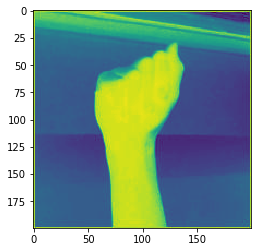

In [6]:
img=immatrix_con[0].reshape(200,200)
plt.imshow(img)
print (train_data[0].shape)
print (train_data[1].shape)
(X, y) = (train_data[0],train_data[1])

In [7]:
# normalize inputs from 0-255 to 0-1
X= (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + 0.001)
# STEP 1: split X and y into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=4)

# reshape to be [samples][pixels][width][height]
trainX = trainX.reshape(trainX.shape[0], 1, 200, 200).astype('float32')
testX = testX.reshape(testX.shape[0], 1, 200, 200).astype('float32')

# one hot encode outputs
trainY = np_utils.to_categorical(trainY)
testY = np_utils.to_categorical(testY)
num_classes = testY.shape[1]

In [8]:
#Build the CNN model
def baseline_model():
	# create model
    model = Sequential()
    model.add(Conv2D(32, 5, 5, border_mode='valid', 
             input_shape=(1, 200, 200), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, 3, 3, border_mode='valid',  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))#

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    model.add(Dropout(0.2))#
    model.add(Dense(64, activation='relu'))#

    model.add(Dense(num_classes, activation='softmax'))
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
model.summary()
model.get_config()
model.get_weights()
model.output_shape

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 196, 196)  832         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 98, 98)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 32, 98, 98)    0           maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 96, 96)    9248        dropout_1[0][0]                  
___________________________________________________________________________________________

(None, 5)

In [9]:
start_time = time.clock()
# Fit the model
hist1 = model.fit(trainX, trainY, validation_data=(testX, testY), nb_epoch=10, batch_size=200, verbose=2)

end_time = time.clock()
pretraining_time = (end_time - start_time)
print ('Training took %f minutes' % (pretraining_time / 60.))

Train on 10500 samples, validate on 4500 samples
Epoch 1/10
1342s - loss: 1.8246 - acc: 0.2416 - val_loss: 1.5722 - val_acc: 0.2816
Epoch 2/10
1238s - loss: 1.3473 - acc: 0.4308 - val_loss: 1.1728 - val_acc: 0.5842
Epoch 3/10
1238s - loss: 0.9117 - acc: 0.6560 - val_loss: 0.7970 - val_acc: 0.7013
Epoch 4/10
1226s - loss: 0.5845 - acc: 0.7913 - val_loss: 0.4993 - val_acc: 0.8571
Epoch 5/10
1233s - loss: 0.3957 - acc: 0.8651 - val_loss: 0.3317 - val_acc: 0.9087
Epoch 6/10
1235s - loss: 0.2717 - acc: 0.9078 - val_loss: 0.2765 - val_acc: 0.9173
Epoch 7/10
1294s - loss: 0.1970 - acc: 0.9376 - val_loss: 0.1912 - val_acc: 0.9422
Epoch 8/10
1567s - loss: 0.1569 - acc: 0.9518 - val_loss: 0.1708 - val_acc: 0.9471
Epoch 9/10
1483s - loss: 0.1311 - acc: 0.9605 - val_loss: 0.1360 - val_acc: 0.9587
Epoch 10/10
1476s - loss: 0.1094 - acc: 0.9654 - val_loss: 0.1355 - val_acc: 0.9578
Training took 222.309865 minutes


In [10]:
# Final evaluation of the model
loss, accuracy = model.evaluate(testX, testY)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

4500/4500 [==============================] - 241s   

Loss: 0.14, Accuracy: 95.78%


In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
# Final evaluation for each class and compute the confusion_matrix
y_pred = model.predict_classes(testX)
p=model.predict_proba(testX) # to predict probability

target_names = ['A', 'B', 'C', 'D', 'E']
print (classification_report(np.argmax(testY,axis=1), y_pred,target_names=target_names))
confusion_matrix = confusion_matrix(np.argmax(testY,axis=1), y_pred)

4500/4500 [==============================] - 279s   
             precision    recall  f1-score   support

          A       0.99      0.91      0.95       904
          B       0.92      0.98      0.95       935
          C       0.99      0.98      0.99       861
          D       0.95      1.00      0.97       895
          E       0.96      0.92      0.94       905

avg / total       0.96      0.96      0.96      4500



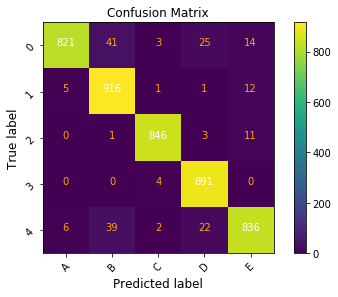

In [12]:
target_names1 = ['0', '1', '2', '3', '4']
plt.imshow(confusion_matrix, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names1, rotation=45)
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, confusion_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "orange")
plt.tight_layout()
plt.title('Confusion Matrix', fontsize='12')
plt.ylabel('True label', fontsize='12')
plt.xlabel('Predicted label', fontsize='12')
plt.show()

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])


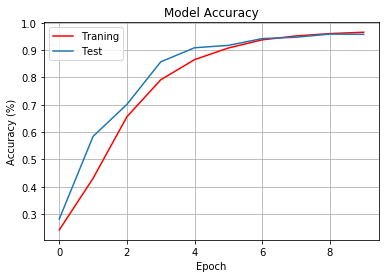

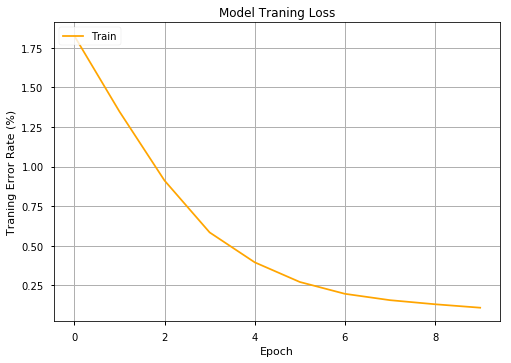

In [13]:
print(hist1.history.keys())
# summarize history for accuracy
#plt.style.use('seaborn-notebook')
#plt.subplot(2, 1, 1)
plt.plot(hist1.history['acc'], color='red')
plt.plot(hist1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Traning', 'Test'], loc='upper left')
plt.grid(True)
plt.show()

# summarize history for loss
#plt.subplot(2, 1, 2)
plt.style.use('seaborn-notebook')
plt.plot(hist1.history['loss'], color='orange')
#plt.plot(history.history['val_loss'])
plt.title('Model Traning Loss')
plt.ylabel('Traning Error Rate (%)')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.grid(True)
plt.show()

In [29]:
# Save the trained weights
ans = raw_input("Do you want to save the trained weights - y/n ?")
if ans == 'y':
    filename = raw_input("Enter file name - ")
    fname = 'C:\Users\Lalo\Desktop\work\Project_vision\waigth' + str(filename) + ".hdf5"
    model.save_weights(fname,overwrite=True)
else:
    model.save_weights("newWeight_96.hdf5",overwrite=True)

    # Save model as well
    # model.save("newModel.hdf5")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-29-7b43e72a0394>, line 5)

In [33]:
filename = "originalmodel"
fname = 'C:\Users\Lalo\Desktop\work\Project_vision\waigth\' + str(filename) + ".hdf5"
model.save_weights(fname,overwrite=True)

SyntaxError: EOL while scanning string literal (<ipython-input-33-0a2104638d8b>, line 2)